## Comparative Study of Linear and RBF SVMs on the Breast Cancer Dataset

Apply linear and RBF SVMs on the Breast Cancer dataset. 
 1) Download the Breast Cancer dataset from the sklearn.datasets package.
 2) Out of the 30 available features, select only ”Worst area” and ”Mean Concave Points”.
 3) Visualize the data from the Positive and Negative class with the ”Mean Concave Points” on the x-axis and ”Worst Area” on the     y-axis. 
 4) Train two linear SVM classifiers with the regularization hyperparameter C equal to 0.1 and 1000, respectively. Don’t forget     data standardization. 
 5) Plot the data points, the decision boundaries and the margins for the two classifiers. 
 6) Display the number of Support Vectors and the training set F1-score for each of the two classifiers.
 7) Run a Grid Search for an RBF SVM, with the following hyperparameter options: C: [0.1, 1, 10, 100] , gamma: [0.1, 1, 10, 100] 
 8) Display the best hyperparameter values, the number of support vectors, and the training set F1-score for the best model. 
 9) Plot the data points and the decision boundary for the best RBF model.

This assignment explores Support Vector Machines (SVMs) on the Breast Cancer dataset using two selected features for visualization. It compares linear SVMs with different regularization strengths, then applies hyperparameter tuning for an RBF SVM to find the best model. The goal is to understand the effect of parameters, visualize decision boundaries, and evaluate model performance.

### 1.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
#rcParams is a dictionary containing Matplotlib's default settings
#The update() method modifies the settings in rcParams
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

In [3]:
#Download the Breast Cancer dataset from the sklearn.datasets package.
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer(as_frame=True)

In [4]:
print("The sklearn breast cancer dataset keys:")
print(breast_cancer.keys())

The sklearn breast cancer dataset keys:
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
type(breast_cancer)

sklearn.utils._bunch.Bunch

The breast_cancer dataset is provided by scikit-learn in the form of a Bunch object, which functions as a dictionary-like container rather than a tabular data structure. In order to leverage the full functionality and analytical methods available within the Pandas DataFrame framework, it is necessary to convert the Bunch object into a DataFrame representation.

In [7]:
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
data['target'] = breast_cancer.target  # Add the target column

# Display the first few rows of the DataFrame
print(data.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

## 2.

In [8]:
#Out of the 30 available features, select only ”Worst area” and ”Mean Concave Points”.
X = breast_cancer.data[["worst area", "mean concave points"]]
#The target_names array provides the mapping of 0 to "malignant" and 1 to "benign".
y = (breast_cancer.target)

## 3.

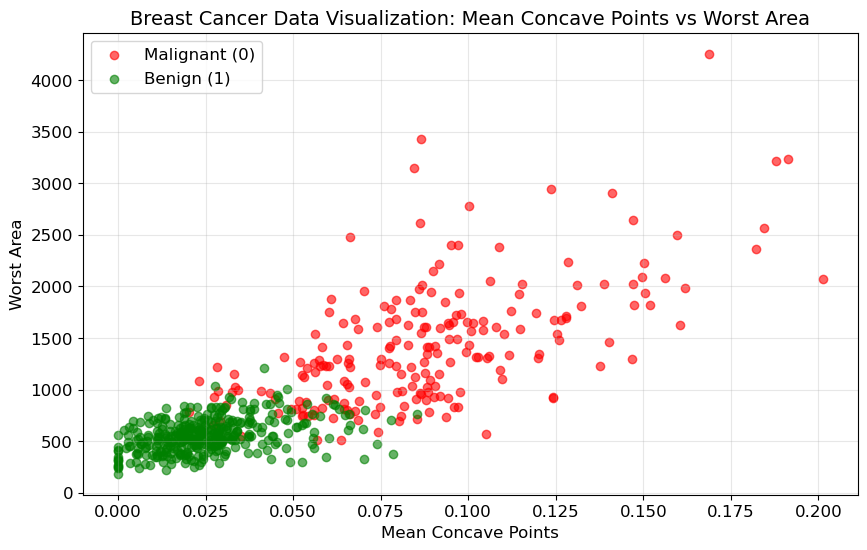

In [9]:
#Visualize the data from the Positive and Negative class with the ”Mean Concave Points” on the x-axis and ”Worst Area” on the y-axis.
# Visualize the data: Positive (Benign) vs Negative (Malignant)
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0]["mean concave points"], X[y == 0]["worst area"], color='r', label='Malignant (0)', alpha=0.6)
plt.scatter(X[y == 1]["mean concave points"], X[y == 1]["worst area"], color='g', label='Benign (1)', alpha=0.6)
# Beautify the plot
plt.title("Breast Cancer Data Visualization: Mean Concave Points vs Worst Area", fontsize=14)
plt.xlabel("Mean Concave Points", fontsize=12)
plt.ylabel("Worst Area", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

The scatter plot illustrates the relationship between Mean Concave Points (x-axis) and Worst Area (y-axis) in the Breast Cancer dataset. Observations corresponding to benign tumors (green markers) are predominantly clustered within lower values of both features, indicating limited variability in this region. In contrast, malignant cases (red markers) exhibit a broader dispersion and occupy higher ranges of Mean Concave Points and Worst Area, reflecting greater heterogeneity in tumor characteristics.

## 4.

In [10]:
#Scale the data before training the model because SVM is sensitive to the scale of features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Train two SVM classifiers with different C values
from sklearn.svm import SVC
svm_1 = SVC(kernel='linear', C=0.1, random_state=42)   # Model with C=0.1
svm_2 = SVC(kernel='linear', C=1000, random_state=42)  # Model with C=1000

In [12]:
# Train the models
svm_1.fit(X_scaled, y)

SVC(C=0.1, kernel='linear', random_state=42)

In [13]:
svm_2.fit(X_scaled, y)

SVC(C=1000, kernel='linear', random_state=42)

## 5.

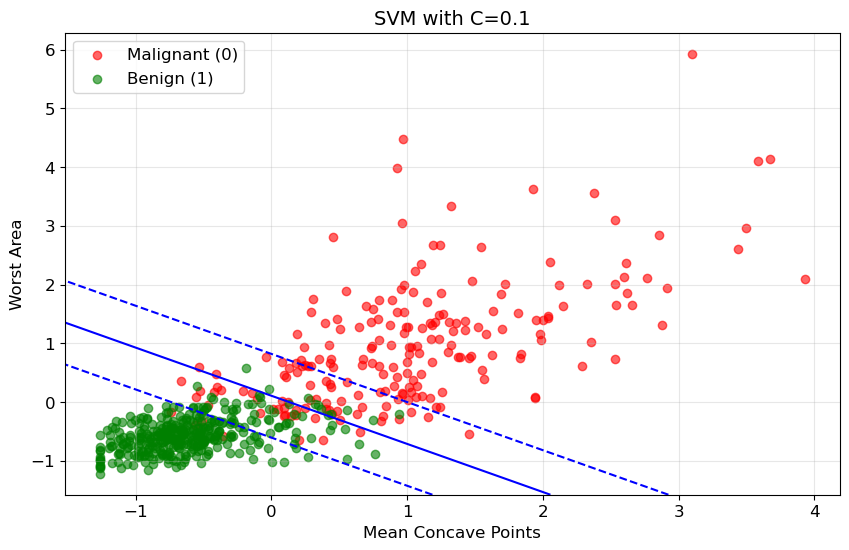

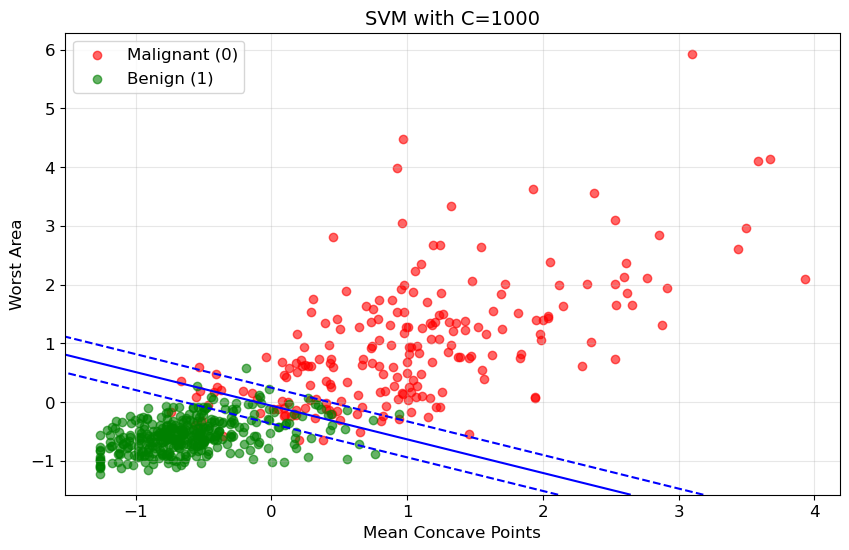

In [14]:
# Function to plot decision boundaries and margins
def plot_decision_boundary(clf, X, y, title):
    plt.figure(figsize=(10, 6))
    # Plot data points
    plt.scatter(X[y == 0, 1], X[y == 0, 0], color='r', label='Malignant (0)', alpha=0.6)
    plt.scatter(X[y == 1, 1], X[y == 1, 0], color='g', label='Benign (1)', alpha=0.6)
    # Plot decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # Create grid with swapped axes
    xx, yy = np.meshgrid(
        np.linspace(xlim[0], xlim[1], 100),
        np.linspace(ylim[0], ylim[1], 100)
    )
    Z = clf.decision_function(np.c_[yy.ravel(), xx.ravel()])  
    Z = Z.reshape(xx.shape)
    # Plot decision boundary and margins
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='blue')
    plt.title(title, fontsize=14)
    plt.xlabel("Mean Concave Points", fontsize=12)  
    plt.ylabel("Worst Area", fontsize=12)           
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()
# Plot for SVM with C = 0.1
plot_decision_boundary(svm_1, X_scaled, y, "SVM with C=0.1")
# Plot for SVM with C = 1000
plot_decision_boundary(svm_2, X_scaled, y, "SVM with C=1000")

The SVM model with C=0.1 exhibits a wider margin compared to the model with C=1000. In SVM theory, a larger margin is generally indicative of better generalization. Therefore, this observation suggests that a lower value of the regularization parameter C (i.e., 0.1) is more favorable than a higher value (i.e., 1000) for this dataset.

## 6.

In [15]:
# Display the number of support vectors for each classifier
print("Number of support vectors (C=0.1):", len(svm_1.support_))
print("Number of support vectors (C=1000):", len(svm_2.support_))

Number of support vectors (C=0.1): 129
Number of support vectors (C=1000): 85


In [16]:
# Compute and display the F1-score for each classifier
from sklearn.metrics import f1_score
y_pred_1 = svm_1.predict(X_scaled)
y_pred_2 = svm_2.predict(X_scaled)
f1_1 = f1_score(y, y_pred_1)
f1_2 = f1_score(y, y_pred_2)
print(f"F1-score (C=0.1): {f1_1:.4f}")
print(f"F1-score (C=1000): {f1_2:.4f}")

F1-score (C=0.1): 0.9441
F1-score (C=1000): 0.9512


## 7.

To ensure proper cross-validation and avoid data leakage, a scikit-learn Pipeline was employed, combining feature standardization and the RBF SVM classifier. This approach standardizes the features within each fold of the cross-validation, preventing information from the test folds from influencing the training process. A Grid Search was then performed over the hyperparameters C=[0.1,1,10,100] and γ=[0.1,1,10,100], using 5-fold cross-validation and F1-score as the evaluation metric. This setup allows simultaneous hyperparameter tuning and model evaluation while maintaining the integrity of the validation procedure.

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define a pipeline with standardization and RBF SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf', random_state=42))
])

# Define hyperparameter grid for Grid Search
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [0.1, 1, 10, 100]
}

# Set up GridSearchCV with 5-fold cross-validation and F1 scoring
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')

# Fit the grid search to the data
grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC(random_state=42))]),
             param_grid={'svc__C': [0.1, 1, 10, 100],
                         'svc__gamma': [0.1, 1, 10, 100]},
             scoring='f1')

## 8.

In [18]:
from sklearn.metrics import f1_score

# Display the best hyperparameter values
print("Best parameters found by Grid Search:", grid_search.best_params_)

# Display the best cross-validated F1-score from Grid Search
print(f"Best cross-validated F1-score: {grid_search.best_score_:.4f}")

# Retrieve the best pipeline
best_pipeline = grid_search.best_estimator_

# Make predictions using the pipeline (handles scaling internally)
y_pred_best = best_pipeline.predict(X)

# Compute F1-score on the full dataset
f1_best = f1_score(y, y_pred_best)
print(f"F1-score on the full dataset: {f1_best:.4f}")

# Access the underlying SVC model inside the pipeline
best_svc = best_pipeline.named_steps['svc']

# Display the number of support vectors
print("Number of support vectors for the best model:", len(best_svc.support_))

Best parameters found by Grid Search: {'svc__C': 1, 'svc__gamma': 10}
Best cross-validated F1-score: 0.9465
F1-score on the full dataset: 0.9606
Number of support vectors for the best model: 197


## 9.

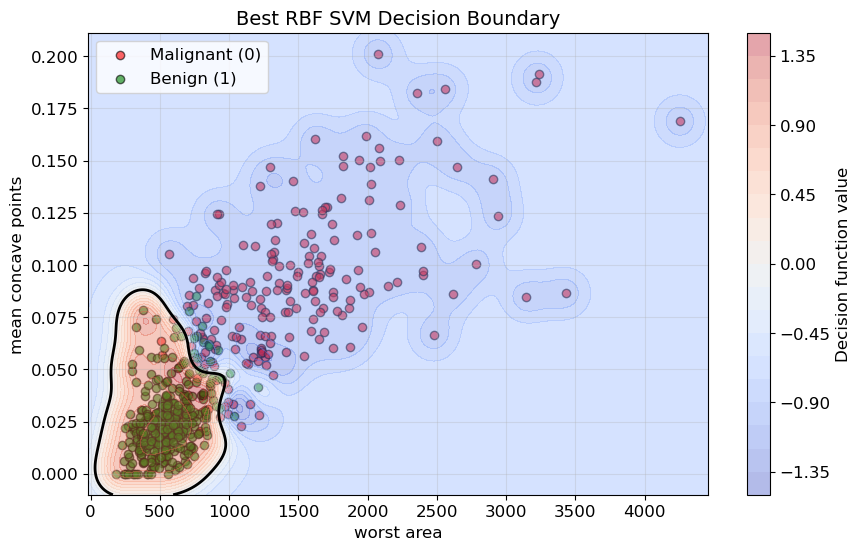

In [30]:
def plot_rbf_decision_boundary(clf_pipeline, X_df, y, title):
    plt.figure(figsize=(10, 6))
    
    # Plot data points
    plt.scatter(X_df[y == 0].iloc[:, 0], X_df[y == 0].iloc[:, 1],
                color='r', label='Malignant (0)', alpha=0.6, edgecolor='k')
    plt.scatter(X_df[y == 1].iloc[:, 0], X_df[y == 1].iloc[:, 1],
                color='g', label='Benign (1)', alpha=0.6, edgecolor='k')
    
    # Get plot limits
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Mesh grid
    xx, yy = np.meshgrid(
        np.linspace(xlim[0], xlim[1], 300),
        np.linspace(ylim[0], ylim[1], 300)
    )
    grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X_df.columns)
    
    # Decision function
    Z = clf_pipeline.decision_function(grid)
    Z = Z.reshape(xx.shape)
    
    # Contour plot
    cs = plt.contourf(xx, yy, Z, levels=20, cmap=plt.cm.coolwarm, alpha=0.4)
    plt.contour(xx, yy, Z, levels=[0], colors='k', linewidths=2)  # decision boundary
    
    # Safe colorbar
    try:
        plt.colorbar(cs, label="Decision function value")
    except Exception:
        pass  # skip colorbar if only one level
    
    # Labels
    plt.title(title, fontsize=14)
    plt.xlabel(X_df.columns[0], fontsize=12)
    plt.ylabel(X_df.columns[1], fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()
    
# Plot the best RBF model decision boundary
plot_rbf_decision_boundary(best_pipeline, X, y, "Best RBF SVM Decision Boundary")

This assignment focuses on applying Support Vector Machines (SVMs) to the Breast Cancer dataset from sklearn. The task begins by selecting two specific features, Worst Area and Mean Concave Points, so the data can be visualized in two dimensions. After plotting the two classes, two linear SVM classifiers with different regularization strengths (C = 0.1 and C = 1000) are trained and compared, with their decision boundaries and margins visualized and their performance evaluated in terms of support vectors and F1-score. A grid search is then performed to tune hyperparameters for an RBF SVM (testing different values of C and gamma), the best model is identified, and its decision boundary and performance are reported. The overall goal is to understand how linear and nonlinear SVMs behave, how hyperparameters affect decision boundaries, and how to evaluate and visualize models effectively.